# Hodgkin Huxley Model Tutorial

This is a tutorial for the Hodgkin-Huxley model of a squid axon. The parameters that can be changed include the reversal potentials for Sodium, Potassium and an otherwise collective leak; the maximal conductances of each; the total time of simulation and the current injected. If the current injected is zero, the simulation stays at resting membrane potential.

Written by Varun Saravanan, February, 2018.

## Define Parameters

Units are NOT SI. Refer to comments if not clear. In general, time is in ms, conductance is in mS, current is in microA and capacitance is in microF

In [1]:
dt = 0.01          #Integration time step in ms. Reduce if you get infinity or NaN errors.
tsim = 1000        #Total time of simulation in ms.
Cm = 0.01          #Membrane capacitance in microF. Default = 10 nF.
Gl = 3e-3          #Leak conductance in mS. Default = 3 microS.
Gk = 0.36          #Maximum Potassium conductance in mS. Default = 0.36 mS.
Gna = 1.2          #Maximum Sodium conductance. Default = 1.2 mS.
El = -54.387       #Leak reversal potential in mV. Default = -54.387 mV.
Ek = -77           #Potassium reversal potential in mV. Default = -77 mV.
Ena = 50           #Sodium reversal potential in mV. Default = 50 mV.

## Define integration variables

Do not change these variables. All values of interest will be stored in these variables.

In [42]:
import numpy as np
niter = int(tsim//dt)
Vm = np.zeros(niter)
m = np.zeros(niter)
n = np.zeros(niter)
h = np.zeros(niter)
alpha_n = np.zeros(niter)
beta_n = np.zeros(niter)
alpha_m = np.zeros(niter)
beta_m = np.zeros(niter)
alpha_h = np.zeros(niter)
beta_h = np.zeros(niter)
tau_n = np.zeros(niter)
tau_m = np.zeros(niter)
tau_h = np.zeros(niter)
n_inf = np.zeros(niter)
m_inf = np.zeros(niter)
h_inf = np.zeros(niter)
Ie = np.zeros(niter)

## Current Injection parameters

The simulation can vary depending on the current injected. Use the default value to see regular spiking. Use a lower value to see either pre-threshold activity or a single spike or a slower regular spiking. Try to find the current at which the neuron first fires. In addition to positive (depolarizing) current, try to inject hyperpolarizing current. See if you can observe a post-inhibitory rebound. Note: For post-inhibitory rebound, you will have to end current injection before the end of the simulation period.

In [46]:
I_amp = -0.050        #Current injection amplitude in microA. Default = 200 nA.
t_start = 50        #Start time of current injection.
t_end = 150       #End time of current injection.
Ie[int(t_start//dt):int(t_end//dt)] = I_amp

## Initial Values

Simulation results can change slightly depending on what "state" the neuron starts at. Experiment with this idea by changing the values for starting membrane potential and channel states below:

In [43]:
Vm[0] = -65    #Membrane potential
m[0] = 0.0529  #Sodium activation gate
n[0] = 0.3177  #Potassium activation gate
h[0] = 0.5961  #Sodium inactivation gate

## Computation Block

The following block of code is where the actual computation occurs and the membrane potential for the entire duration of the simulation is obtained. DO NOT CHANGE these equations.

In [47]:
import math as ma
for i in np.arange(niter-1):
    #First, for each gating variable m, n and h, we need to compute the equilibrium state at the current time step
    #given the membrane potential at present.
    #For n:
    alpha_n[i] = 0.01*(Vm[i] + 55)/(1 - ma.exp(-0.1*(Vm[i] + 55)));
    beta_n[i] = 0.125*ma.exp(-0.0125*(Vm[i] + 65));
    tau_n[i] = 1/(alpha_n[i] + beta_n[i]);
    n_inf[i] = alpha_n[i]*tau_n[i];
    
    #For m:
    alpha_m[i] = 0.1*(Vm[i] + 40)/(1 - ma.exp(-0.1*(Vm[i] + 40)));
    beta_m[i] = 4*ma.exp(-0.0556*(Vm[i] + 65));
    tau_m[i] = 1/(alpha_m[i] + beta_m[i]);
    m_inf[i] = alpha_m[i]*tau_m[i];
    
    #For h:
    alpha_h[i] = 0.07*ma.exp(-0.05*(Vm[i] + 65));
    beta_h[i] = 1/(1 + ma.exp(-0.1*(Vm[i] + 35)));
    tau_h[i] = 1/(alpha_h[i] + beta_h[i]);
    h_inf[i] = alpha_h[i]*tau_h[i];
    
    #Then, we need to compute the change in state of each gating variable given their current equilibrium states:
    n[i+1] = n[i] + dt/tau_n[i]*(n_inf[i] - n[i]);
    m[i+1] = m[i] + dt/tau_m[i]*(m_inf[i] - m[i]);
    h[i+1] = h[i] + dt/tau_h[i]*(h_inf[i] - h[i]);
    
    #Finally, we use the updated gating variables to compute the new membrane potential:
    Vm[i+1] = Vm[i] + dt/Cm*(Ie[i] - Gl*(Vm[i] - El) - Gk*(n[i]**4)*(Vm[i] - Ek) - Gna*(m[i]**3)*h[i]*(Vm[i] - Ena));

## Plot figures

Use the following block of code to plot the membrane potential versus time during the simulation.

<IPython.core.display.Javascript object>


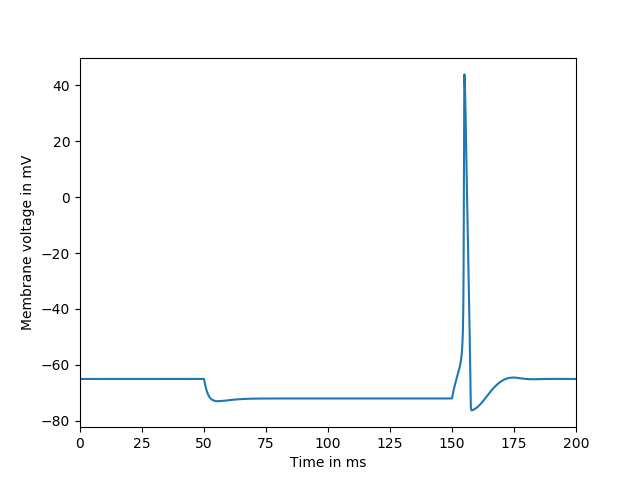

(0, 200)

In [48]:
import matplotlib.pyplot as plt
%matplotlib notebook
t = np.arange(niter)*dt
fig = plt.plot(t,Vm)
plt.xlabel('Time in ms')
plt.ylabel('Membrane voltage in mV')
lim_of_plot = 200     #Change this variable to see more or less time of simulation (in ms).
plt.xlim(0, lim_of_plot)


Use the figure below to plot the gating variables versus time to understand how their fluctuation shapes the membrane potential and vice-versa.

<IPython.core.display.Javascript object>


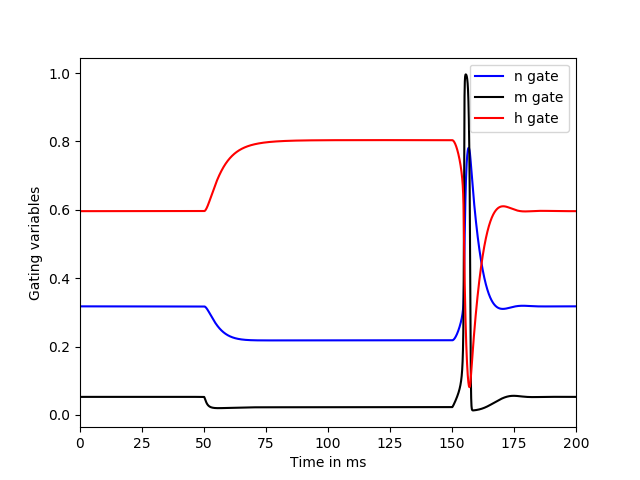

In [49]:
plt.figure()
plt.plot(t,n,color='b',label='n gate')
plt.plot(t,m,color='k',label='m gate')
plt.plot(t,h,color='r',label='h gate')
plt.xlabel('Time in ms')
plt.ylabel('Gating variables')
plt.xlim(0, lim_of_plot)
plt.legend()